
# 1. Introduction

This notebook focuses on **Credit Score Classification** using a dataset from Kaggle.  
We will analyze the dataset, perform feature engineering, and train machine learning models to classify credit scores.

### Steps Covered:
- Load and inspect the dataset
- Exploratory Data Analysis (EDA)
- Data Preprocessing & Feature Engineering
- Model Training & Evaluation
- Conclusion

---


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading, inspection 

In [70]:
df = pd.read_csv(r"C:\Users\Global Tech\Downloads\archive (4)\train.csv")
print(df.head())
print(df.info())

C:\Users\Global Tech\AppData\Local\Temp\ipykernel_5000\4096431694.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Global Tech\Downloads\archive (4)\train.csv")


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [71]:
# Check for missing values
print(df.isnull().sum())

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nmissing values",missing_percent[missing_percent > 0])  # Show only columns with missing values

print(df.describe())  # Summary statistics


ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

missing values Name               

## Initial Data Inspection  
Before diving into preprocessing, we check:  
- Dataset shape and column names  
- Missing values and data types  
- Summary statistics for numerical insights  


In [72]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [73]:
print(df.nunique())

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64


In [74]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['O']))  # 'O' means object (categorical)


       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

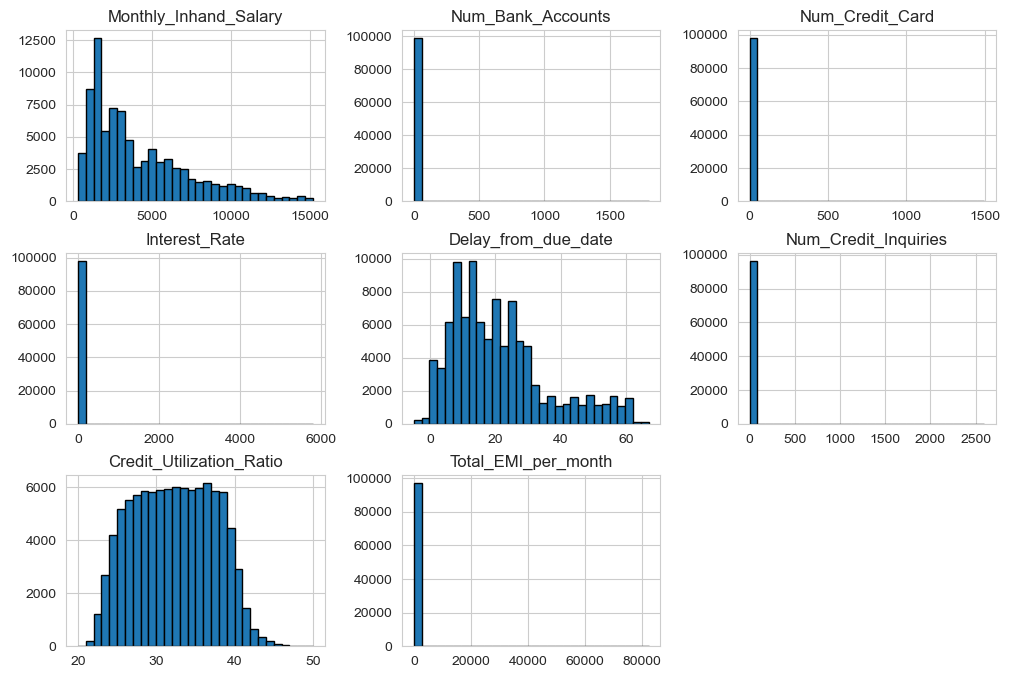

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot histograms
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.show()


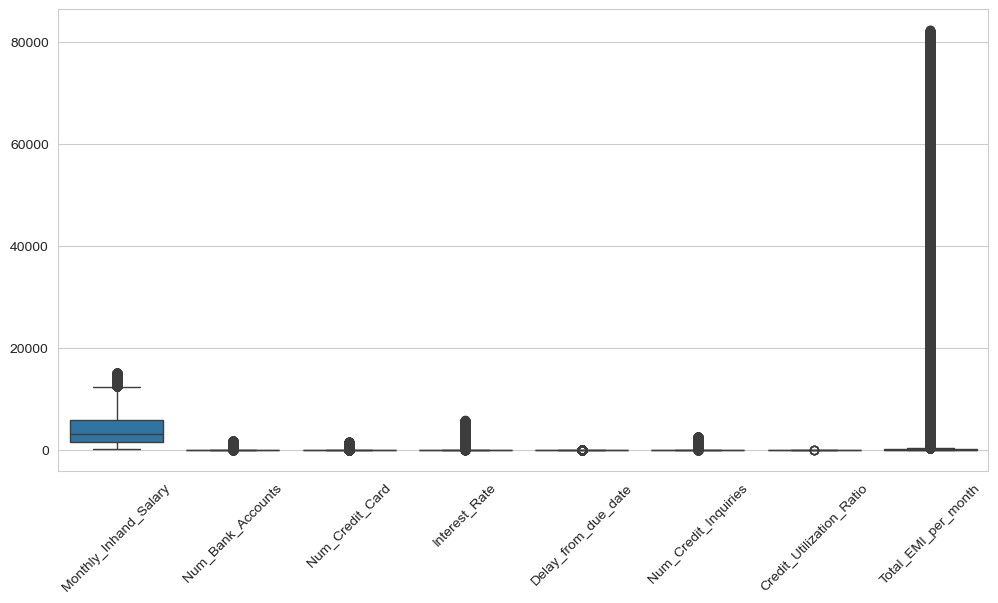

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)  
plt.show()


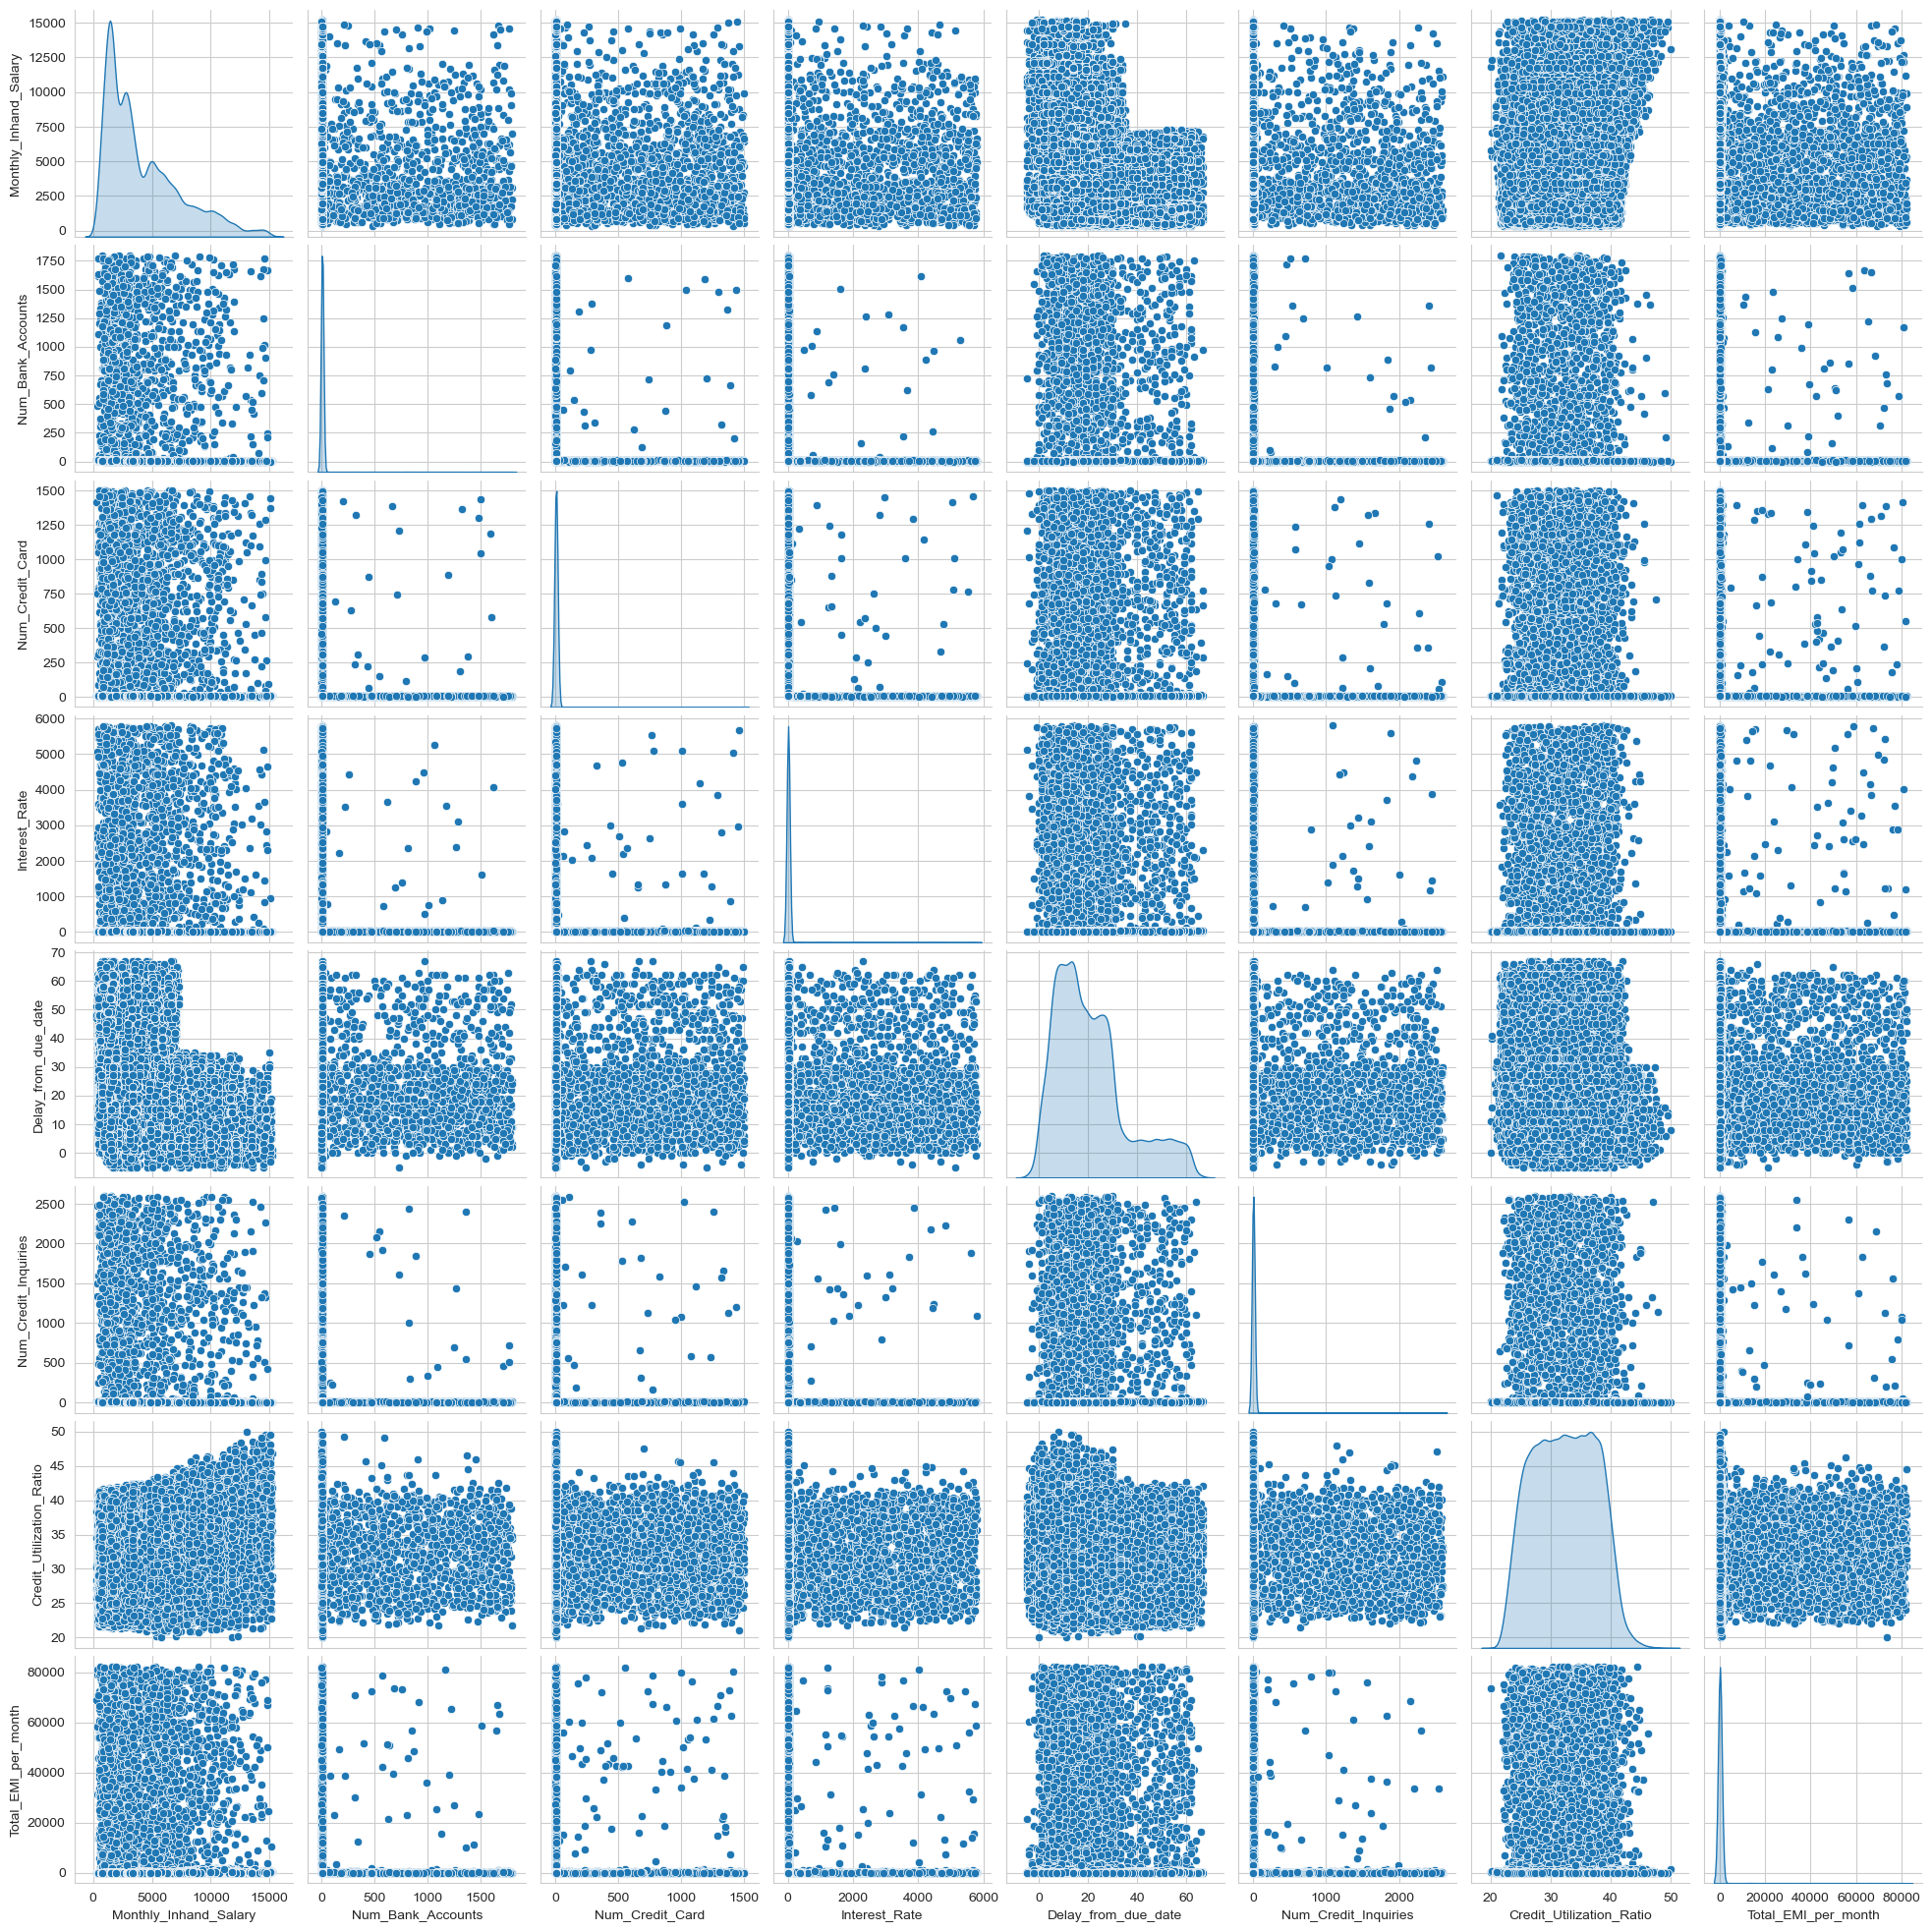

In [77]:
sns.pairplot(df, diag_kind='kde')
plt.show()


### deleting unecessary columns 

In [78]:
# Drop columns that do not contribute to predictions
df.drop(columns=['ID', 'Customer_ID', 'SSN', 'Name'], inplace=True)

# Verify the columns are removed
df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [79]:
# Check missing values count & percentage
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display only columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)


                         Missing Values  Percentage
Monthly_Inhand_Salary             15002      15.002
Type_of_Loan                      11408      11.408
Num_of_Delayed_Payment             7002       7.002
Num_Credit_Inquiries               1965       1.965
Credit_History_Age                 9030       9.030
Amount_invested_monthly            4479       4.479
Monthly_Balance                    1200       1.200


## Data Transformation

In [80]:
# Remove non-numeric characters and convert to float
df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

# Now fill missing values with median
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())

# Verify fix
print(df[['Annual_Income']].info())
print(df['Annual_Income'].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Annual_Income  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
0    19114.12
1    19114.12
2    19114.12
3    19114.12
4    19114.12
Name: Annual_Income, dtype: float64


In [81]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Annual_Income'] / 12)


In [82]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna("Unknown")


In [83]:
# Convert 'Num_of_Delayed_Payment' to numeric
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Now fill missing values with median
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

# Verify fix
print(df[['Num_of_Delayed_Payment']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Num_of_Delayed_Payment  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


In [84]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())


In [85]:
# Convert 'Amount_invested_monthly' to numeric
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Now fill missing values with median
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

# Verify fix
print(df[['Amount_invested_monthly']].info())
print(df['Amount_invested_monthly'].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Amount_invested_monthly  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
0     80.415295
1    118.280222
2     81.699521
3    199.458074
4     41.420153
Name: Amount_invested_monthly, dtype: float64


In [86]:
# Convert 'Monthly_Balance' to numeric
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Now fill missing values with median
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())

# Verify fix
print(df[['Monthly_Balance']].info())
print(df['Monthly_Balance'].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Monthly_Balance  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
0    312.494089
1    284.629162
2    331.209863
3    223.451310
4    341.489231
Name: Monthly_Balance, dtype: float64


## `Handling Missing Data

In [87]:
print(df.isnull().sum().sum())  # Should return 0 if all missing values are handled


9030


In [88]:
# Check missing values count & percentage
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display only columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)


                    Missing Values  Percentage
Credit_History_Age            9030        9.03


In [89]:
# Convert 'Credit_History_Age' to string (if not already)
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)

# Extract numeric years from 'Credit_History_Age'
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)').astype(float)

# Fill missing values with the median
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].median())

# Verify the fix
print(df[['Credit_History_Age']].info())
print(df['Credit_History_Age'].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Credit_History_Age  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
0    22.0
1    18.0
2    22.0
3    22.0
4    22.0
Name: Credit_History_Age, dtype: float64


## categorical columns Analysis

In [90]:
# Identify categorical columns (excluding numerical ones)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:", categorical_cols)


Categorical Columns: ['Month', 'Age', 'Occupation', 'Num_of_Loan', 'Type_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


C:\Users\Global Tech\AppData\Local\Temp\ipykernel_5000\4039808100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="pastel", order=df[col].value_counts().index)
C:\Users\Global Tech\AppData\Local\Temp\ipykernel_5000\4039808100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="pastel", order=df[col].value_counts().index)
C:\Users\Global Tech\AppData\Local\Temp\ipykernel_5000\4039808100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="pastel", order=df[col].value_count

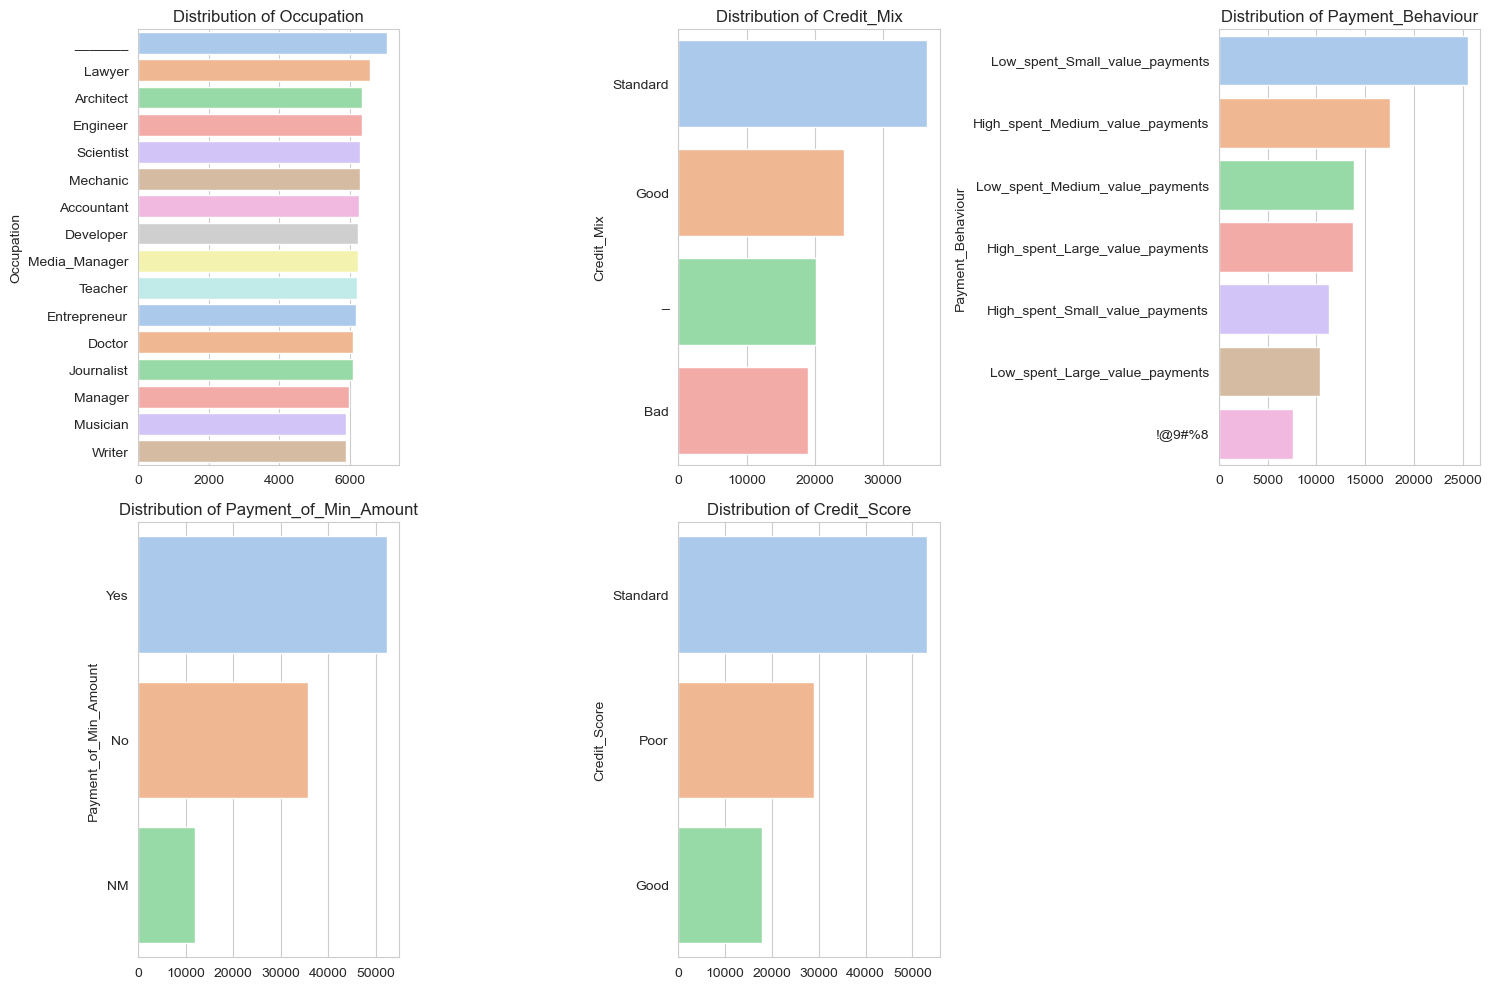

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Plot count distributions for categorical features
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Score'], 1):
    plt.subplot(2, 3, i) 
    sns.countplot(y=df[col], palette="pastel", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


C:\Users\Global Tech\AppData\Local\Temp\ipykernel_5000\2932019633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Credit_Score'], palette="viridis")


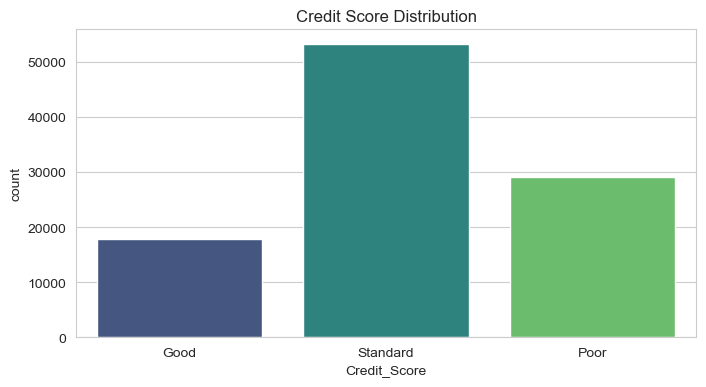

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64


In [92]:
# Plot distribution of Credit Score
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Credit_Score'], palette="viridis")
plt.title("Credit Score Distribution")
plt.show()

# Print value counts
print(df['Credit_Score'].value_counts(normalize=True))


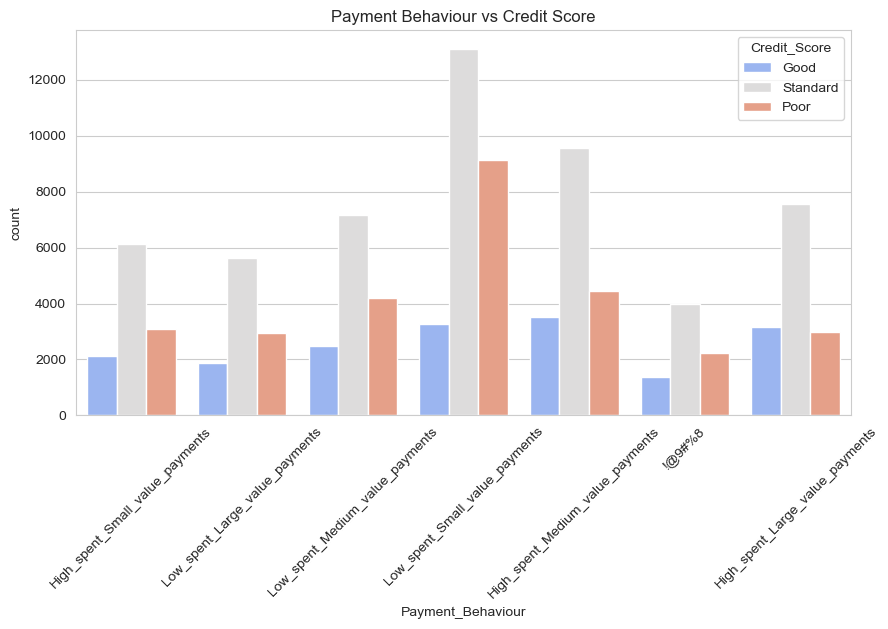

In [93]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df, palette="coolwarm")
plt.title("Payment Behaviour vs Credit Score")
plt.xticks(rotation=45)
plt.show()


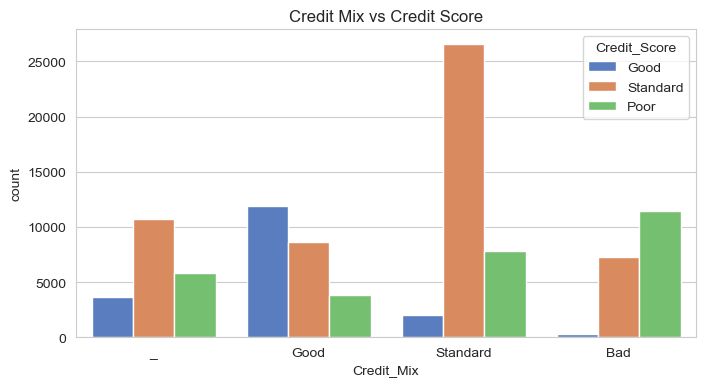

In [94]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=df, palette="muted")
plt.title("Credit Mix vs Credit Score")
plt.show()


## Ctegorical to numeric transformation for Algorithms

In [95]:
# Convert these features to numeric
numeric_features = ['Age', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt']

for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify conversion
print(df[numeric_features].dtypes)


Age                     float64
Num_of_Loan             float64
Changed_Credit_Limit    float64
Outstanding_Debt        float64
dtype: object


In [96]:
from sklearn.preprocessing import LabelEncoder

# Features to encode
categorical_to_encode = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_to_encode:
    df[col] = encoder.fit_transform(df[col])

# Verify encoding
print(df[categorical_to_encode].head())


   Occupation  Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour
0          12           3                      1                  3
1          12           1                      1                  4
2          12           1                      1                  5
3          12           1                      1                  6
4          12           1                      1                  2


In [97]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check if 'Credit_Score' is in the list before trying to remove it
if 'Credit_Score' in numerical_cols:
    numerical_cols.remove('Credit_Score')

print("Numerical Features:", numerical_cols)


Numerical Features: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [98]:
# Display statistical summary
df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,95061.0,110.934505,6.894079e+02,-500.000000,24.000000,33.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,5743.258611,4.581469e+04,303.645417,1625.793333,3101.371910,5971.780000,1.990380e+06
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,95215.0,2.780339,6.250094e+01,-100.000000,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,29.373010,2.156718e+02,-3.000000,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,97909.0,10.389025,6.789496e+00,-6.490000,5.320000,9.400000,14.870000,3.697000e+01


## Fixing scewed data

In [99]:
# Define valid age range
min_valid_age = 18
max_valid_age = 90

# Compute median of only valid ages (between 18 and 90)
valid_median = df[(df['Age'] >= min_valid_age) & (df['Age'] <= max_valid_age)]['Age'].median()

# Replace invalid ages (< 18 or > 90) with the computed median
df['Age'] = df['Age'].apply(lambda x: valid_median if x < min_valid_age or x > max_valid_age else x)

print(df)

          Month   Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0       January  23.0          12       19114.12            1824.843333   
1      February  23.0          12       19114.12            1592.843333   
2         March  34.0          12       19114.12            1592.843333   
3         April  23.0          12       19114.12            1592.843333   
4           May  23.0          12       19114.12            1824.843333   
...         ...   ...         ...            ...                    ...   
99995     April  25.0           9       39628.99            3359.415833   
99996       May  25.0           9       39628.99            3359.415833   
99997      June  25.0           9       39628.99            3359.415833   
99998      July  25.0           9       39628.99            3359.415833   
99999    August  25.0           9       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3  

In [100]:
# If bank account numbers are negative, make them positive
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: abs(x))


In [101]:
# Fix Num_Credit_Cards (cap at 10)
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: x if x <= 10 else 10)

In [102]:
# Cap Interest Rate at 50%
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if x <= 50 else 50)


In [103]:

# Fix Num_Loans 
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: abs(x)) 
df['Num_0f_Loan'] = df['Num_of_Loan'].apply(lambda x: x if x <= 10 else 10)  


In [104]:
# Fix Delay_From_Due_Date (set negatives to 0)
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: x if x >= 0 else 0)


In [105]:
# Fix Num_Delayed_Payments 
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: x if x >= 0 else 0)

In [106]:
# Display statistical summary
df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,95061.0,34.386625,9.671802e+00,18.000000,27.000000,34.000000,41.000000,5.600000e+01
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,5743.258611,4.581469e+04,303.645417,1625.793333,3101.371910,5971.780000,1.990380e+06
Num_Bank_Accounts,100000.0,17.091700,1.174048e+02,0.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,5.634400,2.148861e+00,0.000000,4.000000,5.000000,7.000000,1.000000e+01
Interest_Rate,100000.0,15.253030,9.994859e+00,1.000000,8.000000,13.000000,20.000000,5.000000e+01
Num_of_Loan,95215.0,10.921914,6.160202e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.081910,1.484020e+01,0.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,29.383280,2.156704e+02,0.000000,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,97909.0,10.389025,6.789496e+00,-6.490000,5.320000,9.400000,14.870000,3.697000e+01


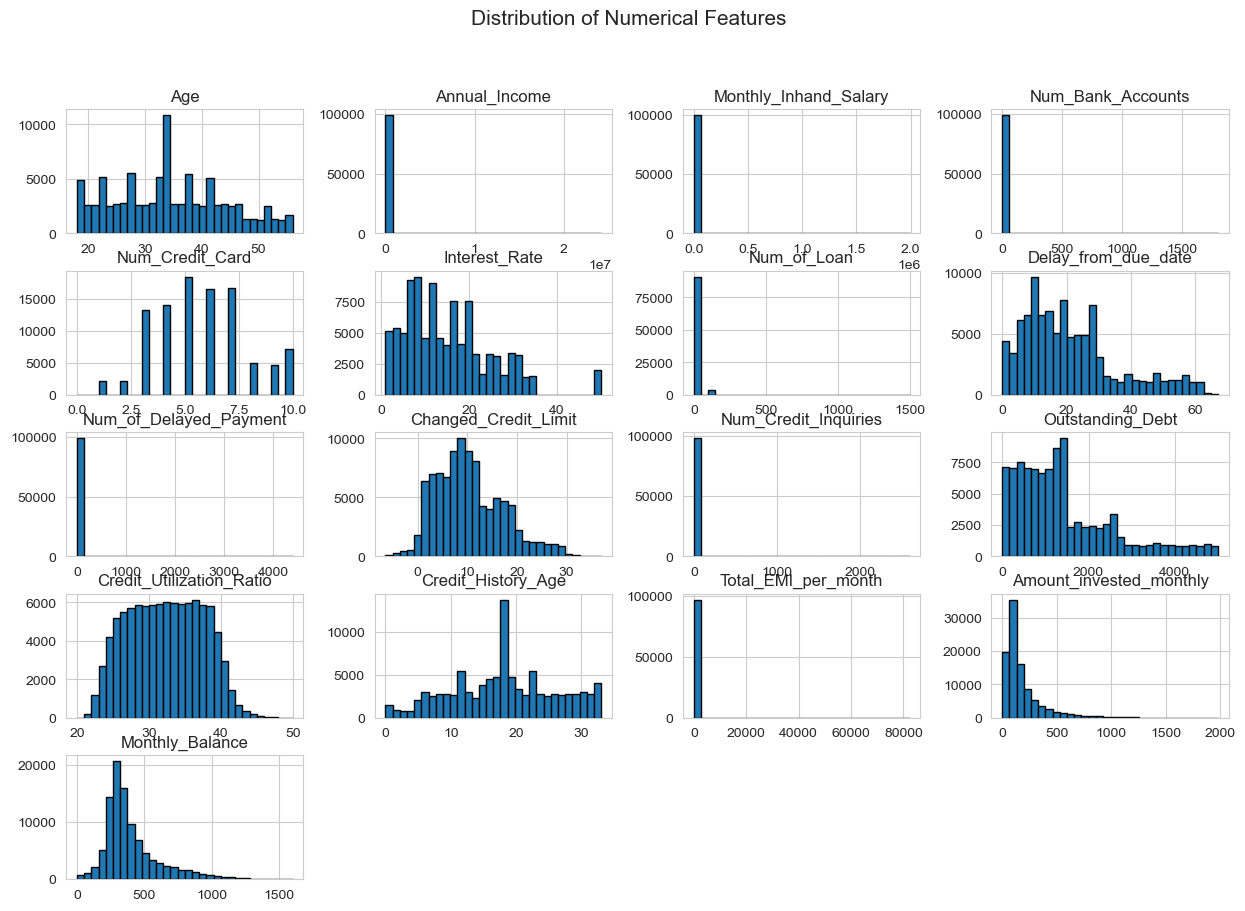

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Plot histograms for numerical features
df[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=15)
plt.show()


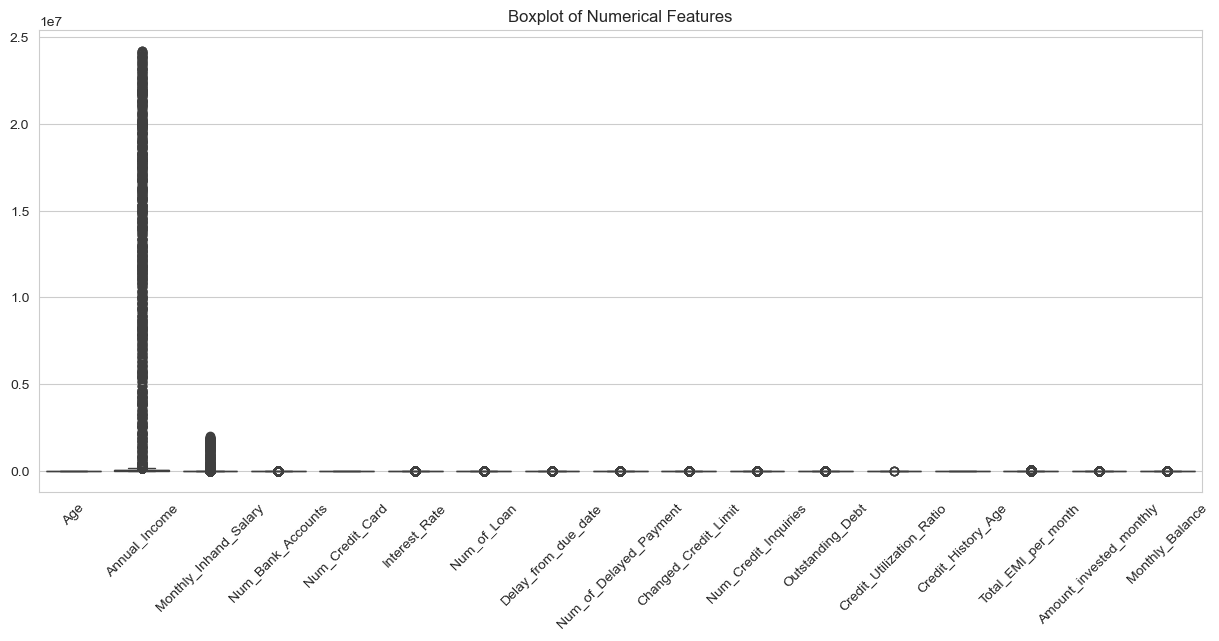

In [108]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


C:\Users\Global Tech\AppData\Local\Temp\ipykernel_5000\3076354527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, palette="coolwarm")


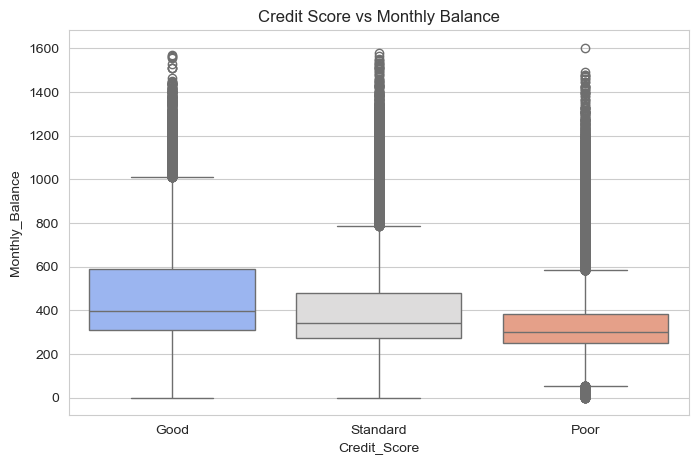

In [109]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, palette="coolwarm")
plt.title("Credit Score vs Monthly Balance")
plt.show()


 ## Heatmap for correlation

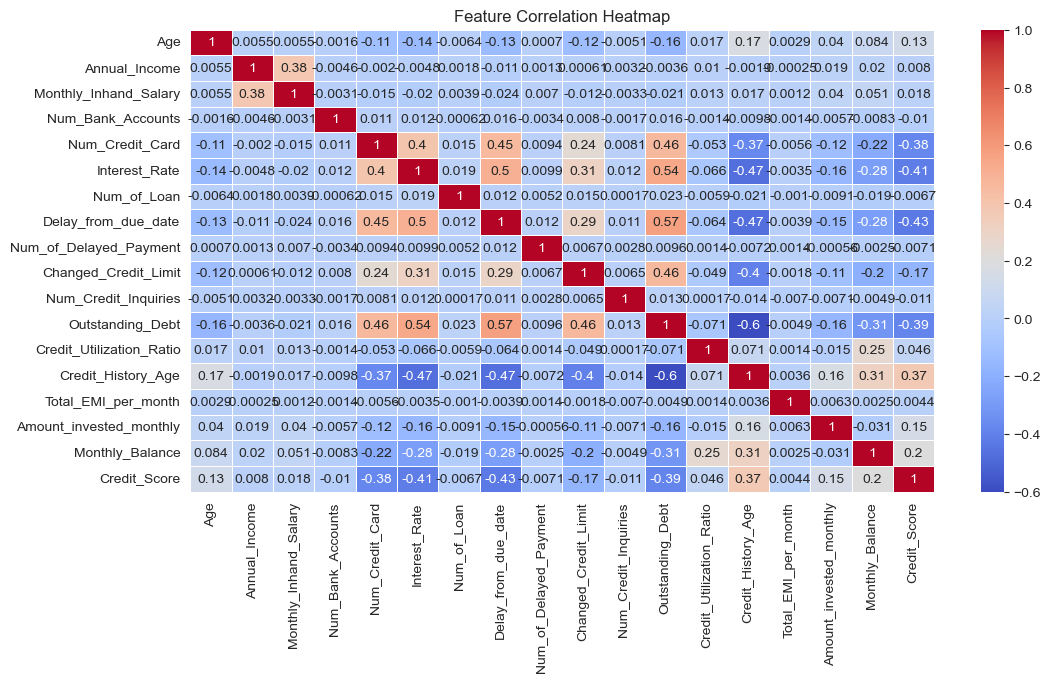

In [110]:
# Convert Credit_Score to numeric mapping
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score'] = df['Credit_Score'].map(credit_score_mapping)

# Now re-run the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols + ['Credit_Score']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [111]:
# Compute correlation of all numerical features with Credit_Score
correlation_with_target = df[numerical_cols].corrwith(df['Credit_Score'])

# Convert to a table format
correlation_table = correlation_with_target.round(3).to_frame(name="Correlation with Credit_Score")

# Display table
print(correlation_table)


                          Correlation with Credit_Score
Age                                               0.126
Annual_Income                                     0.008
Monthly_Inhand_Salary                             0.018
Num_Bank_Accounts                                -0.010
Num_Credit_Card                                  -0.379
Interest_Rate                                    -0.413
Num_of_Loan                                      -0.007
Delay_from_due_date                              -0.431
Num_of_Delayed_Payment                           -0.007
Changed_Credit_Limit                             -0.170
Num_Credit_Inquiries                             -0.011
Outstanding_Debt                                 -0.387
Credit_Utilization_Ratio                          0.046
Credit_History_Age                                0.371
Total_EMI_per_month                               0.004
Amount_invested_monthly                           0.147
Monthly_Balance                                 

In [117]:
# Define important features
selected_features = [
    'Delay_from_due_date',
    'Outstanding_Debt',
    'Credit_History_Age',
    'Num_Credit_Card',
    'Interest_Rate',
    'Amount_invested_monthly',  
    'Credit_Score'  # Target variable
]


df1 = df[selected_features]


print(df_selected.head())


   Delay_from_due_date  Outstanding_Debt  Credit_History_Age  \
0                    3            809.98                22.0   
1                    0            809.98                18.0   
2                    3            809.98                22.0   
3                    5            809.98                22.0   
4                    6            809.98                22.0   

   Changed_Credit_Limit  Monthly_Balance  Amount_invested_monthly  \
0                 11.27       312.494089                80.415295   
1                 11.27       284.629162               118.280222   
2                  9.40       331.209863                81.699521   
3                  6.27       223.451310               199.458074   
4                 11.27       341.489231                41.420153   

   Credit_Utilization_Ratio  Credit_Score  
0                 26.822620             2  
1                 31.944960             2  
2                 28.609352             2  
3                 31.377

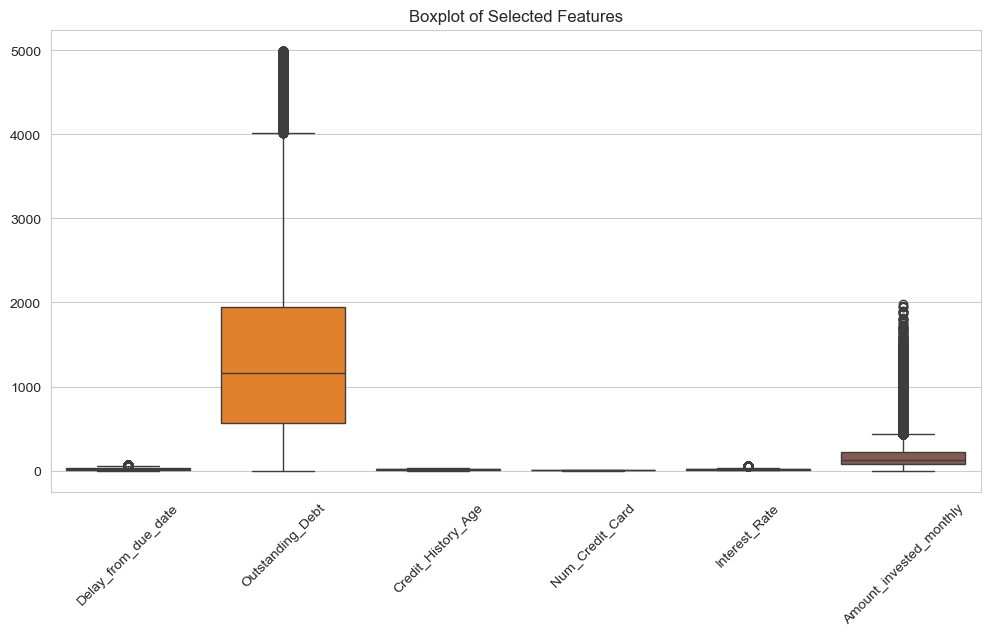

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for selected features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1.drop(columns=['Credit_Score']))
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Features")
plt.show()


## Standarize the data

In [119]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale selected features (excluding target)
df_selected_scaled = df_selected.copy()
df_selected_scaled.iloc[:, :-1] = scaler.fit_transform(df_selected.iloc[:, :-1])

# Verify scaling
print(df_selected_scaled.head())


   Delay_from_due_date  Outstanding_Debt  Credit_History_Age  \
0            -1.218447         -0.534061            0.507915   
1            -1.420601         -0.534061            0.003839   
2            -1.218447         -0.534061            0.507915   
3            -1.083677         -0.534061            0.507915   
4            -1.016292         -0.534061            0.507915   

   Changed_Credit_Limit  Monthly_Balance  Amount_invested_monthly  \
0              0.134183        -0.419562                -0.570549   
1              0.134183        -0.550538                -0.372848   
2             -0.144108        -0.331591                -0.563843   
3             -0.609910        -0.838097                 0.050998   
4              0.134183        -0.283274                -0.774150   

   Credit_Utilization_Ratio  Credit_Score  
0                 -1.067562             2  
1                 -0.066489             2  
2                 -0.718376             2  
3                 -0.177

C:\Users\Global Tech\AppData\Local\Temp\ipykernel_5000\3295084990.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.21844692 -1.42060149 -1.21844692 ...  0.39878965 -0.07290435
 -0.20767407]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_selected_scaled.iloc[:, :-1] = scaler.fit_transform(df_selected.iloc[:, :-1])


## verify misssing data in new columns

In [120]:
# Check for missing values
print("Missing values:\n", df_selected.isnull().sum())

# Check summary statistics
print(df_selected.describe())

# Check first few rows
print(df_selected.head())


Missing values:
 Delay_from_due_date         0
Outstanding_Debt            0
Credit_History_Age          0
Changed_Credit_Limit        0
Monthly_Balance             0
Amount_invested_monthly     0
Credit_Utilization_Ratio    0
Credit_Score                0
dtype: int64
       Delay_from_due_date  Outstanding_Debt  Credit_History_Age  \
count        100000.000000     100000.000000       100000.000000   
mean             21.081910       1423.878951           17.969540   
std              14.840204       1149.497752            7.935336   
min               0.000000          0.230000            0.000000   
25%              10.000000        571.650000           12.000000   
50%              18.000000       1166.370000           18.000000   
75%              28.000000       1933.430000           24.000000   
max              67.000000       4998.070000           33.000000   

       Changed_Credit_Limit  Monthly_Balance  Amount_invested_monthly  \
count         100000.000000    100000.000000

In [121]:

df_selected.loc[:, 'Outstanding_Debt'] = df_selected['Outstanding_Debt'].fillna(df_selected['Outstanding_Debt'].median())
df_selected.loc[:, 'Changed_Credit_Limit'] = df_selected['Changed_Credit_Limit'].fillna(df_selected['Changed_Credit_Limit'].median())


In [122]:
print("Missing values after fix:\n", df_selected.isnull().sum())


Missing values after fix:
 Delay_from_due_date         0
Outstanding_Debt            0
Credit_History_Age          0
Changed_Credit_Limit        0
Monthly_Balance             0
Amount_invested_monthly     0
Credit_Utilization_Ratio    0
Credit_Score                0
dtype: int64


## Model selection, training, hyperparameter tuning 

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [124]:
# Define features (X) and target (y)
X = df_selected.drop(columns=['Credit_Score'])
y = df_selected['Credit_Score']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (80000, 7)
Testing set size: (20000, 7)


In [125]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train & evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Compare results
print("\nModel Performance Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Training Random Forest...

Random Forest Accuracy: 0.6957
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      5799
           1       0.69      0.80      0.74     10635
           2       0.62      0.43      0.51      3566

    accuracy                           0.70     20000
   macro avg       0.68      0.63      0.65     20000
weighted avg       0.69      0.70      0.69     20000

Training Decision Tree...

Decision Tree Accuracy: 0.6129
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      5799
           1       0.66      0.66      0.66     10635
           2       0.49      0.49      0.49      3566

    accuracy                           0.61     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.61      0.61      0.61     20000

Training Logistic Regression...


C:\Users\Global Tech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Global Tech\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:26:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Accuracy: 0.5889
              precision    recall  f1-score   support

           0       0.63      0.42      0.50      5799
           1       0.59      0.81      0.68     10635
           2       0.49      0.21      0.30      3566

    accuracy                           0.59     20000
   macro avg       0.57      0.48      0.49     20000
weighted avg       0.58      0.59      0.56     20000

Training XGBoost...

XGBoost Accuracy: 0.6683
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      5799
           1       0.67      0.79      0.72     10635
           2       0.58      0.36      0.44      3566

    accuracy                           0.67     20000
   macro avg       0.65      0.59      0.61     20000
weighted avg       0.66      0.67      0.66     20000


Model Performance Comparison:
Random Forest: 0.6957
Decision Tree: 0.6129
Logistic Regression: 0.5889
XGBoost: 0.6683


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

#  Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train & evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Compare results
print("\nModel Performance Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

#  Select the best model for hyperparameter tuning
best_model_name = max(results, key=results.get)  # Model with the highest accuracy
best_model = models[best_model_name]  # Retrieve the model

print(f"\nBest performing model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None], # Maximum depth
    'min_samples_split': [2, 5, 10], # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]    # Min samples per leaf
}

#  Hyperparameter Tuning using RandomizedSearchCV (Efficient)
random_search = RandomizedSearchCV(
    best_model, param_grid, 
    n_iter=10, cv=3, scoring='accuracy', 
    n_jobs=-1, verbose=2, random_state=42
)

random_search.fit(X_train, y_train)

# Get the best model after tuning
optimized_model = random_search.best_estimator_

print("\nRandomizedSearchCV Best Hyperparameters:", random_search.best_params_)

#  Train Optimized Model & Evaluate Performance
y_pred_optimized = optimized_model.predict(X_test)

print("\nOptimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print(classification_report(y_test, y_pred_optimized))


Training Random Forest...

Random Forest Accuracy: 0.6957
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      5799
           1       0.69      0.80      0.74     10635
           2       0.62      0.43      0.51      3566

    accuracy                           0.70     20000
   macro avg       0.68      0.63      0.65     20000
weighted avg       0.69      0.70      0.69     20000

Training Decision Tree...

Decision Tree Accuracy: 0.6129
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      5799
           1       0.66      0.66      0.66     10635
           2       0.49      0.49      0.49      3566

    accuracy                           0.61     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.61      0.61      0.61     20000

Training Logistic Regression...


C:\Users\Global Tech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Global Tech\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Accuracy: 0.5889
              precision    recall  f1-score   support

           0       0.63      0.42      0.50      5799
           1       0.59      0.81      0.68     10635
           2       0.49      0.21      0.30      3566

    accuracy                           0.59     20000
   macro avg       0.57      0.48      0.49     20000
weighted avg       0.58      0.59      0.56     20000

Training XGBoost...

XGBoost Accuracy: 0.6683
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      5799
           1       0.67      0.79      0.72     10635
           2       0.58      0.36      0.44      3566

    accuracy                           0.67     20000
   macro avg       0.65      0.59      0.61     20000
weighted avg       0.66      0.67      0.66     20000


Model Performance Comparison:
Random Forest: 0.6957
Decision Tree: 0.6129
Logistic Regression: 0.5889
XGBoost: 0.6683

Best performing model: Random Fore